In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, random_state=42)

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
class LogisticRegressionADAM:
    def __init__(self, learning_rate = 0.1, epochs = 1000, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
        self.lr = learning_rate 
        self.epochs = epochs 
        self.beta1 = beta1 
        self.beta2 = beta2
        self.epsilon = epsilon 
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialise(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0 

        # Adam moments 
        self.m_w = np.zeros(n_features)
        self.v_w = np.zeros(n_features) 
        self.m_b = 0 
        self.v_b = 0 
    
    def compute_loss(self, y, y_pred):
        eps = 1e-8
        return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

    def fit(self, X, y):
        n_samples, n_features = X.shape 
        self.initialise(n_features) 
        self.losses = [] 

        for t in range(1, self.epochs + 1):
            # Forward Pass 
            linear_output = np.dot(X, self.weights) + self.bias 
            y_pred = self.sigmoid(linear_output) 

            # Gradients
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.mean(y_pred - y)

            # Update biased first moment estimates
            self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
            self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db 

            # Update biased second moment estimates 
            self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw ** 2) 
            self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db ** 2) 

            # Correct bias 
            m_w_hat = self.m_w / (1 - self.beta1 ** t) 
            v_w_hat = self.v_w / (1 - self.beta2 ** t) 
            m_b_hat = self.m_b / (1 - self.beta1 ** t) 
            v_b_hat = self.v_b / (1 - self.beta2 ** t) 

            # Update Parameters 
            self.weights = -self.lr * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
            self.bias = -self.lr * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

            # Track Loss 
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)
        
            # if t % 100 == 0:
            #     print(f"Epochs: {t} | Loss: {loss:.4f}")
        
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        return self.predict_proba(X) >= 0.5

In [20]:
model = LogisticRegressionADAM(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

In [21]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.69


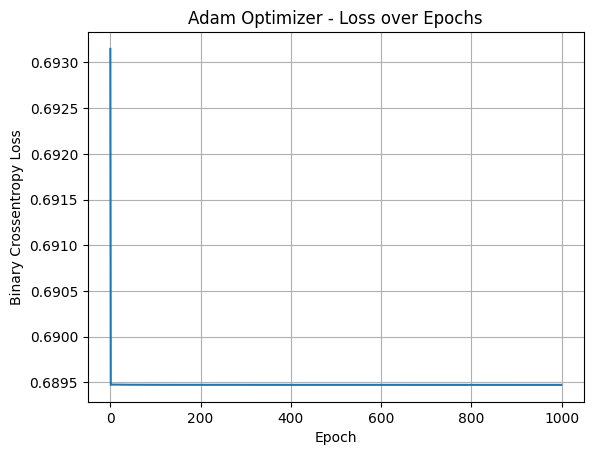

In [22]:
plt.plot(model.losses)
plt.title("Adam Optimizer - Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.grid(True)
plt.show()